# Natural Language Processing Workflow

In [94]:
import pandas as pd
corpus = pd.read_csv('satire_nosatire.csv')

In [95]:
corpus.head()

,body,target
0,Noting that the resignation of James Mattis as...,1
1,Desperate to unwind after months of nonstop wo...,1
2,"Nearly halfway through his presidential term, ...",1
3,Attempting to make amends for gross abuses of ...,1
4,Decrying the Senate’s resolution blaming the c...,1


In [96]:
#Checking to how many documents are in the corpus
corpus.shape

(1000, 2)

In [97]:
#Checking the class balance
corpus.target.value_counts()

1    500
0    500
Name: target, dtype: int64

This is a balanced dataset containing 500 documents of each class. Class 1 referring to a satirical article, and class 2, a real news article.

In [98]:
## Manually removing capitals

Even though the NLTK library provides tokenizers to perform text preprocessing, manually tokenizing provides some freedom during preprocessing.

In [99]:
first_doc = corpus.iloc[0].body
#Removing Capitals
manual_clean = [x.lower() for x in first_doc.split(' ')]
manual_clean[:10]

['noting',
 'that',
 'the',
 'resignation',
 'of',
 'james',
 'mattis',
 'as',
 'secretary',
 'of']

In [100]:
# Manually removing punctuation

In [101]:
import string
string.punctuation

manual_clean = [''.join(c for c in s if c not in string.punctuation) for s in manual_clean]
manual_clean

['noting',
 'that',
 'the',
 'resignation',
 'of',
 'james',
 'mattis',
 'as',
 'secretary',
 'of',
 'defense',
 'marked',
 'the',
 'ouster',
 'of',
 'the',
 'third',
 'top',
 'administration',
 'official',
 'in',
 'less',
 'than',
 'three',
 'weeks',
 'a',
 'worried',
 'populace',
 'told',
 'reporters',
 'friday',
 'that',
 'it',
 'was',
 'unsure',
 'how',
 'many',
 'former',
 'trump',
 'staffers',
 'it',
 'could',
 'safely',
 'reabsorb',
 '“jesus',
 'we',
 'can’t',
 'just',
 'take',
 'back',
 'these',
 'assholes',
 'all',
 'at',
 'once—we',
 'need',
 'time',
 'to',
 'process',
 'one',
 'before',
 'we',
 'get',
 'the',
 'next”',
 'said',
 '53yearold',
 'gregory',
 'birch',
 'of',
 'naperville',
 'il',
 'echoing',
 'the',
 'concerns',
 'of',
 '323',
 'million',
 'americans',
 'in',
 'also',
 'noting',
 'that',
 'the',
 'country',
 'was',
 'only',
 'now',
 'truly',
 'beginning',
 'to',
 'reintegrate',
 'former',
 'national',
 'security',
 'advisor',
 'michael',
 'flynn',
 '“this',
 'is'

In [102]:
# Checking the frequency distribution with the FreqDist function from NLTK

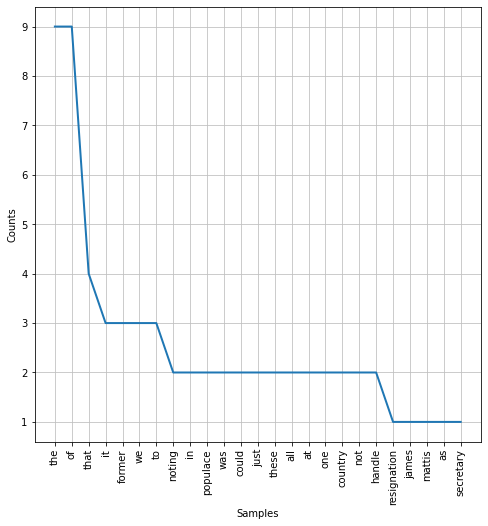

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [103]:
#Checking the frequency distribution before stopword removal
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
fdist = FreqDist(manual_clean)
plt.figure(figsize=(8,8))
fdist.plot(25)

the plot above is showing the highest frequency with stopwords. Since these words have low semantic value, they will be removed.

In [104]:
# Removing stopwords

Stopwords are basically filler words, e.g., prepositions and conjunctions. These words hold a low semantic value and should be removed so they aren’t counted when we vectorize. We can make use of the list of stopwords provided by NLTK. Something to note, if the stopword list doesn’t contain a stopword in a document, we can just add to the list.

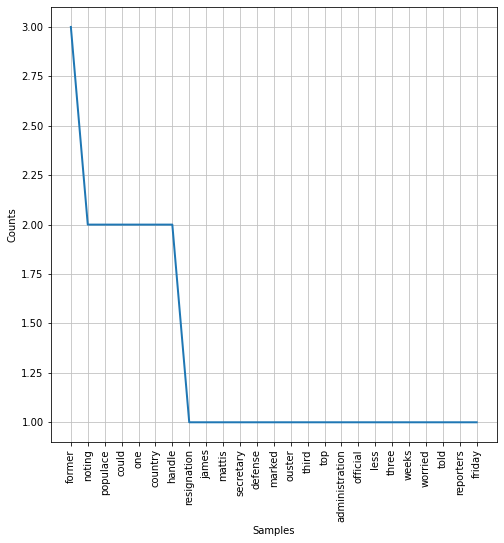

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [105]:
from nltk.corpus import stopwords
manual_clean = [x for x in manual_clean if x not in stopwords.words('english')]
#Checking the frequency distribution with the stopwords removed
fdist = FreqDist(manual_clean)
plt.figure(figsize=(8,8))
fdist.plot(25)

From the frequency distribution plot above, we can see there are still a few filler words we can add to our stopwords list. Let’s go ahead and add could and one to the list.

In [106]:
#Adding to the list of stopwords
stopwords_list = stopwords.words('english')
stopwords_list.extend(['could', 'one'])
manual_clean = [x for x in manual_clean if x not in stopwords_list]

In [107]:
# Removing numbers with regex

Numbers, like stopwords, usually have a low semantic value. This is the case for the text data we’re using so let’s go ahead and remove them. Removing numbers from the first document for example purposes.

In [108]:
import re
pattern = '\d+'
first_doc = corpus.iloc[0].body
num = re.findall(pattern, first_doc)
num

['53', '323']

In [109]:
# Stemming

Stemming is a method where the end of words are removed if it shows a derivational change to the word. Basically just reducing a word tokens down to its root word. This is helpful because most of the semantic meaning of a word is in the root, and a majority of the time, the beginning of a word is the root.

In [110]:
from nltk.stem import *
porter_stemmer = PorterStemmer()
snowball_stemmer = SnowballStemmer(language="english")

In [111]:
#Looping through each word in the document and stem it with both stemmers
for word in first_doc:
    porter_word = porter_stemmer.stem(word)
    snowball_word = snowball_stemmer.stem(word)
    
    if porter_word != snowball_word:
        print(porter_word, snowball_word)

In [112]:
# Lemmatization

Lemming is similar to stemming but instead of just chopping off the end, uses part of speech tags when determining how to transform a word. Lemmatization reduces words showing sort of inflection in order to return a root word that belongs to the language. For example, stemming the word mice would not return mouse but lemming would.

In [113]:
from nltk.stem import WordNetLemmatizer 
  
lemmatizer = WordNetLemmatizer()
print(f'knives becomes: {lemmatizer.lemmatize("knives")}')
print(f'Noting becomes: {lemmatizer.lemmatize(first_doc.split()[0])}')

knives becomes: knife
Noting becomes: Noting


If we wanted to PoS tag the text ourselves, we can make use of the pos_tag function from NLTK. This function will tag each word in a document and return the word along with its PoS tag. We can then, transform the NLTK tags to the tags of the WordNetLemmatizer.

In [114]:
from nltk import pos_tag

first_doc_tagged = pos_tag(first_doc.split())
first_doc_tagged[:10]

[('Noting', 'VBG'),
 ('that', 'IN'),
 ('the', 'DT'),
 ('resignation', 'NN'),
 ('of', 'IN'),
 ('James', 'NNP'),
 ('Mattis', 'NNP'),
 ('as', 'IN'),
 ('Secretary', 'NNP'),
 ('of', 'IN')]

We can make a function to transform the tags to match the WordNetLemmatizer tags.

In [115]:
from nltk.corpus import wordnet
def wordnet_tags(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [116]:
# Transforming part of speech tags

In [117]:
first_doc_tagged = [(x[0], wordnet_tags(x[1])) for x in first_doc_tagged]

In [118]:
# Lemmatizing first_doc_tagged with the tags we obtained with the wordnet_tags function above

In [119]:
first_doc_lemmed = [lemmatizer.lemmatize(x[0], x[1]) for x in first_doc_tagged]

In [120]:
# Bag-of-Words

When performing NLP, the features can be extracted from the text by making a Bag-of-words (BoW). The BoW method will create a Document Term Matrix, a matrix where each column is a unique word and each row is a document. We can use Scikit-Learn’s CountVectorizer to do this on our first_doc_lemmed.

In [121]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
#Transform text documents to a matrix with token counts
vec = CountVectorizer()
X = vec.fit_transform([" ".join(first_doc_lemmed)])
#Casting results as a Pandas DataFrame
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df.head()


C:\Users\chara\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,323,53,administration,advisor,all,also,americans,asshole,at,back,...,top,truly,trump,try,two,unsure,we,weeks,worried,year
0,1,1,1,1,2,1,1,1,2,1,...,1,1,2,1,1,1,4,1,1,2


# Bigrams & Mutual Information Score
Instead of tokenizing the text we could also create Bigrams. A bigram is two adjacent words that are treated as one. Bigrams are helpful when performing sentiment analysis on text data, e.g., upset, barely upset. With bigrams we can apply a frequency filter to remove the bigrams that occur due to random chance. If a bigram occurs multiple times, it must have some meaning. The minimum frequency filter depends on the number of factors in the data, a normal starting value is 5 but should also be experimented with to get the most optimal value.
Bigrams can also be created by calculating their Pointwise Mutual Information Score (PMI). This measures the mutual dependence between a pair of words. The bigram “social media” would most likely return a high PMI score, the pair are more than likely appear together than not.

In [122]:
vec = CountVectorizer(token_pattern=r"([a-zA-Z]+(?:'[a-z]+)?)", stop_words=stopwords_list, ngram_range=[1,2]) #<- Allowing bigrams
X = vec.fit_transform(corpus.body[0:5])
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df.head()

C:\Users\chara\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abuses,abuses power,accept,accept beautiful,accusations,accusations united,acknowledging,acknowledging gift,act,act acted,...,year country,year old,yemen,yemen left,yet,yet another,zinke,zinke acknowledging,zinke apologized,zinke plans
0,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,0,0,1,1,1,1,...,0,0,0,0,0,0,3,1,1,1
4,0,0,0,0,1,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0


In [123]:
# Term Frequency-Inverse Document Frequency (TF-IDF)

TF-IDF scales down the frequencies of tokens to represent how important a word is.
- TF (Term Frequency) — frequency of the word in a single document divided by the total number of words in the document.
- IDF (Inverse Document Frequency) — measure of how much information is provided by a term. IDF can be calculated by taking the total number of documents in the corpus, dividing by the number of documents the term appears in, and taking the logarithm of the result.
- TF-IDF — Term Frequency and the Inverse Document Frequency multiplied together

In [124]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer(token_pattern=r"([a-zA-Z]+(?:'[a-z]+)?)",    stop_words=stopwords_list)
X = tf_vec.fit_transform(corpus.body)
df = pd.DataFrame(X.toarray(), columns = tf_vec.get_feature_names())
df.head()

C:\Users\chara\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aa,aaaaaaah,aaaaaah,aaaaargh,aaaah,aaah,aaargh,aah,aahing,aap,...,zoos,zor,zozovitch,zte,zuckerberg,zuercher,zverev,zych,zzouss,zzzzzst
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [125]:
# make a function to perform preprocessing steps up until count vectorizing.

In [126]:
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
def prepare_doc(doc, stopwords=stopwords_list):
    regex_tokenizer = RegexpTokenizer(r"([a-zA-Z]+(?:’[a-z]+)?)")
    doc = regex_tokenizer.tokenize(doc)
    doc = [x.lower() for x in doc]
    doc = [x for x in doc if x not in stopwords_list]
    doc = pos_tag(doc)
    doc = [(x[0], wordnet_tags(x[1])) for x in doc]
    #Could stem here instead of lemmatizing
    lemma = WordNetLemmatizer() 
    doc = [lemma.lemmatize(x[0], x[1]) for x in doc]
    return ' '.join(doc)

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import nltk
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer
import sklearn.feature_extraction.text 
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, mean_squared_error, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [128]:
# Loading in the corpus

In [129]:
df = pd.read_csv('satire_nosatire.csv')
df.head(10)

,body,target
0,Noting that the resignation of James Mattis as...,1
1,Desperate to unwind after months of nonstop wo...,1
2,"Nearly halfway through his presidential term, ...",1
3,Attempting to make amends for gross abuses of ...,1
4,Decrying the Senate’s resolution blaming the c...,1
5,Following sentencing for his role in a hush-mo...,1
6,"Grimacing and clutching at his shoulder, Fox N...",1
7,Categorically denying allegations that the tac...,1
8,Quashing rumors that the team was looking to m...,1
9,Claiming it was the most humane way to deal wi...,1


In [130]:
#Defining stopwords
stopwords_list = stopwords.words('english')
X = df.body
#Preprocessing function to remove numbers, stopwords, lowercase the #capitals, generate PoS tags, and lemmatize the text

X = [prepare_doc(x, stopwords_list) for x in X]
y = df.target
X[:2]

['note resignation james mattis secretary defense mark ouster third top administration official less three week worry populace tell reporter friday unsure many former trump staffer could safely reabsorb jesus can’t take back asshole need time process one get next say year old gregory birch naperville il echo concern million american also note country truly begin reintegrate former national security advisor michael flynn sustainable i’d say handle maybe one two former member trump’s inner circle remainder year that’s country limit u populace confirm could handle piece shit try rejoin society',
 'desperate unwind month nonstop work investigate russian influence election visibly exhaust special counsel robert mueller power phone friday order give break news concern probe holiday break last thing want i’m spending time family cascade push notification tell yet another russian oligarch political operative highly place socialite use deutsche bank channel funnel money campaign say former fbi 

In [131]:
# Performing train test split

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [133]:
# Creating preprocess pipeline and the full pipeline with a Random Forest Classifier

In [134]:
tfidf_vec = Pipeline([('tfidf_vec', TfidfVectorizer())])
tfidf = Pipeline([('tfidf', TfidfTransformer())])
preprocess = Pipeline([
    ('tfidf_vec', tfidf_vec),
    ('tfidf', tfidf)
])
pipe = Pipeline([
    ('preprocess', preprocess),
    ('clf', RandomForestClassifier())
])

In [135]:
# Fitting the pipeline to X_train and y_train

In [136]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 Pipeline(steps=[('tfidf_vec',
                                  Pipeline(steps=[('tfidf_vec',
                                                   TfidfVectorizer())])),
                                 ('tfidf',
                                  Pipeline(steps=[('tfidf',
                                                   TfidfTransformer())]))])),
                ('clf', RandomForestClassifier())])

## Predicting on X_test

In [144]:
y_hat = pipe.predict(X_test)

 Defining evaluation function to plot a confusion matrix and return the accuracy, precision, recall, and f1 scores

In [140]:
def evaluation(y, y_hat, title = 'Confusion Matrix'):
    cm = confusion_matrix(y, y_hat)
    precision = precision_score(y, y_hat)
    recall = recall_score(y, y_hat)
    accuracy = accuracy_score(y,y_hat)
    f1 = f1_score(y,y_hat)
    print('Recall: ', recall)
    print('Accuracy: ', accuracy)
    print('Precision: ', precision)
    print('F1: ', f1)
    sns.heatmap(cm,  cmap= 'PuBu', annot=True, fmt='g', annot_kws=    {'size':20})
    plt.xlabel('predicted', fontsize=18)
    plt.ylabel('actual', fontsize=18)
    plt.title(title, fontsize=18)
    
    plt.show();

## Evaluating the classifier

Recall:  0.9836065573770492
Accuracy:  0.976
Precision:  0.967741935483871
F1:  0.975609756097561


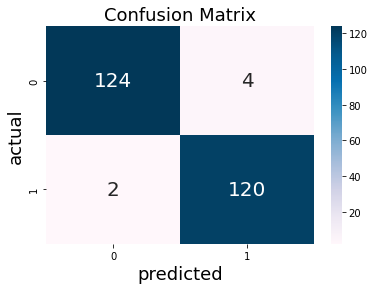

In [142]:
evaluation(y_test, y_hat)

> End of Program